# Gradient Boosting from Scratch

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

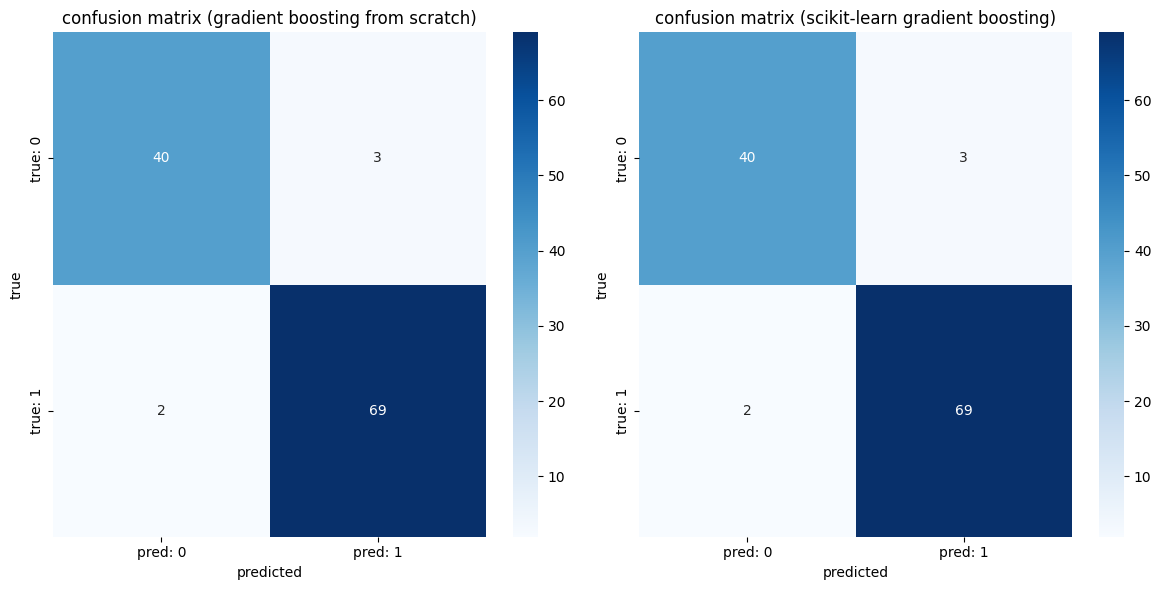

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# gradient boosting from scratch
class GradientBoostingScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []
        self.gammas = []

    def fit(self, X, y):
        # initialize predictions with the mean of target values
        self.F = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            # calculate residuals
            residuals = y - self.F
            # train a simple regression tree on residuals
            tree = DecisionTreeRegressor(max_depth=1)
            tree.fit(X, residuals)
            # calculate step size (gamma)
            predictions = tree.predict(X)
            gamma = np.sum(residuals * predictions) / np.sum(predictions ** 2)
            self.trees.append(tree)
            self.gammas.append(gamma)
            # update predictions
            self.F += self.learning_rate * gamma * predictions

    def predict(self, X):
        # aggregate predictions from all trees
        F = np.full((X.shape[0],), np.mean(self.F))
        for tree, gamma in zip(self.trees, self.gammas):
            F += self.learning_rate * gamma * tree.predict(X)
        return (F > 0.5).astype(int)

# load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train gradient boosting from scratch
gb_scratch = GradientBoostingScratch(n_estimators=50, learning_rate=0.1)
gb_scratch.fit(X_train, y_train)
y_pred_scratch_gb = gb_scratch.predict(X_test)

# train gradient boosting using scikit-learn
gb_sklearn = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_sklearn.fit(X_train, y_train)
y_pred_sklearn_gb = gb_sklearn.predict(X_test)

# calculate confusion matrices
cm_scratch_gb = confusion_matrix(y_test, y_pred_scratch_gb)
cm_sklearn_gb = confusion_matrix(y_test, y_pred_sklearn_gb)

# plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# gradient boosting from scratch confusion matrix
sns.heatmap(cm_scratch_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[0])
axs[0].set_title('confusion matrix (gradient boosting from scratch)')
axs[0].set_xlabel('predicted')
axs[0].set_ylabel('true')

# scikit-learn gradient boosting confusion matrix
sns.heatmap(cm_sklearn_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[1])
axs[1].set_title('confusion matrix (scikit-learn gradient boosting)')
axs[1].set_xlabel('predicted')
axs[1].set_ylabel('true')

plt.tight_layout()
plt.show()